## 2-4. BeautifulSoup을 이용해 원하는 요소 가져오기 II - Hashcode 질문 가져오기
- BeautifulSoup을 이용해서 Hashcode 질문 내용을 스크래핑해봅시다.

## 스크래핑하고자 하는 사이트 확인하기
직접 접속해서 해당 사이트를 확인해봅시다 : https://hashcode.co.kr/

아래 두 가지 원칙을 지킵니다.

1. 과도한 요청을 보내지 않습니다.
2. 받아온 정보 활용에 유의합니다.

In [1]:
# 다음 User-Agent를 추가해봅시다.

user_agent = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.97 Safari/537.36"}


In [3]:
# 필요한 라이브러리를 불러온 후, 요청을 진행해봅시다.

import requests
from bs4 import BeautifulSoup

res = requests.get("https://hashcode.co.kr/", user_agent)

In [4]:
# 응답을 바탕으로 BeautifulSoup 객체를 생성해봅시다.
soup = BeautifulSoup(res.text, "html.parser")

In [7]:
# 질문의 제목을 모아서 가져와보기

soup.find("li", "question-list-item").find("div", "question").find("div", "top").h4.text



'리스트 항목 하나씩 읽어 색깔 바꾸기'

In [12]:
# 질문 제목 가져오기
questions = soup.find_all("li", "question-list-item")

for question in questions :
    print(question.find("div", "question").find("div", "top").h4.text)

리스트 항목 하나씩 읽어 색깔 바꾸기
파이썬에서 엑셀2의 내용을 엑셀1에 삽입하는 방법이 무엇이 있을까요?
기존 list안에 새로운 리스트로  append 하기
과제풀이요청 삭제
Xcode 한글 자소분리 질문. 안녕이라고 입력하면 ㅇㅏㄴㄴㅕㅇ 이런식으로 출력
Python 웹스크래핑 불가
포트번호까지 완성된 주소로 커버하는 방법
JAVA 2차원 배열
파이썬 undefined name '함수이름' 오류
c6328
포트란 치환문 코딩 빌드 에러 질문드립니다.
안드로이드 스튜디오 설치가 안됩니다
python 정규 표현식 질문
DOZE모드에서 GPS정보 얻기
파이썬 ip주소 증가시키기
JAVA Scanner
파이썬/ 폴더 내 순차적으로 존재하는 파일들에 명령어를 반복 적용하고 싶습니다. 도와주세요.
인텔리제이에서 스칼라 클래스 옵션이 안뜹니다
포인터 관련하여 질문드립니다! *z = ~(hap & 0xFF); 에서 ~의 의미는?
for문으로 폴더내에 모든 파일을 적용하고싶습니다..
opencv c++ 질문입니다 VideoWrite 관하여 질문입니다.
opencv c++ 질문 도형들의 중심값을 구해서 그 도형들 사이에 선을 그리기
c언어 배열 5의 배수를 지웠는데 실행을 하면 마지막 숫자 12가 나오지 않는다
자바스크립트 질문있습니다
파이썬 접근제한자 질문있습니다.
런타임 오류 이유가 궁금합니다..
C언어 질문입니다.
파이썬 if문안에 continue
파이썬 중복 제거 하는 방법
파이썬 min key 가 이해되지 않음.
판다스 기존 엑셀 시트에 특정 열만 추가하여 저장
자바스크립트 this 바인딩 개념이 헷갈리는데 도와주실 수 있나요?
jsp 아이디찾기 데이터 베이스 연결 문제
셀레늄 에러
리스트 자체가 input인데 어떻게 입력받을 수 있을까요?
코드로 안드로이드 시스템 시간을 변경할 수 있나요?
파이썬 초보 Pandas에서 인덱스 행 추가어떻게해야할까요?
우분투 cli 환경에서 git 사용 질문이요
파이썬 리스트 여러개의 요소를 한개의 요소로 합치는 방법 
자바 코드에

## Bonus: 페이지네이션(Pagination)

페이지네이션은 많은 정보를 인덱스로 구분하는 기법입니다.
저희가 진행하고 있는 사이트는 Query String을 통해서 이를 구분하는데요,
이를 감안해서 다시 한번 진행해봅시다.

https://hashcode.co.kr/?page={i}

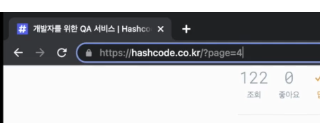

In [16]:
# Pagination이 되어있는 질문 리스트의 제목을 모두 가져와봅시다.
# 과도한 요청을 방지하기 위해 1초마다 요청을 보내봅시다.

import time

for i in range(1, 6): #1~5 page
    res = requests.get("https://hashcode.co.kr/?page={}".format(i), user_agent) #중괄호 안 i 입력
    soup = BeautifulSoup(res.text, "html.parser")
    
    questions = soup.find_all("li", "question-list-item")
    for question in questions:
        print(question.find("div", "question").find("div", "top").h4.text)
    
    time.sleep(0.5)


리스트 항목 하나씩 읽어 색깔 바꾸기
파이썬에서 엑셀2의 내용을 엑셀1에 삽입하는 방법이 무엇이 있을까요?
기존 list안에 새로운 리스트로  append 하기
과제풀이요청 삭제
Xcode 한글 자소분리 질문. 안녕이라고 입력하면 ㅇㅏㄴㄴㅕㅇ 이런식으로 출력
Python 웹스크래핑 불가
포트번호까지 완성된 주소로 커버하는 방법
JAVA 2차원 배열
파이썬 undefined name '함수이름' 오류
c6328
포트란 치환문 코딩 빌드 에러 질문드립니다.
안드로이드 스튜디오 설치가 안됩니다
python 정규 표현식 질문
DOZE모드에서 GPS정보 얻기
파이썬 ip주소 증가시키기
JAVA Scanner
파이썬/ 폴더 내 순차적으로 존재하는 파일들에 명령어를 반복 적용하고 싶습니다. 도와주세요.
인텔리제이에서 스칼라 클래스 옵션이 안뜹니다
포인터 관련하여 질문드립니다! *z = ~(hap & 0xFF); 에서 ~의 의미는?
for문으로 폴더내에 모든 파일을 적용하고싶습니다..
opencv c++ 질문입니다 VideoWrite 관하여 질문입니다.
opencv c++ 질문 도형들의 중심값을 구해서 그 도형들 사이에 선을 그리기
c언어 배열 5의 배수를 지웠는데 실행을 하면 마지막 숫자 12가 나오지 않는다
자바스크립트 질문있습니다
파이썬 접근제한자 질문있습니다.
런타임 오류 이유가 궁금합니다..
C언어 질문입니다.
파이썬 if문안에 continue
파이썬 중복 제거 하는 방법
파이썬 min key 가 이해되지 않음.
판다스 기존 엑셀 시트에 특정 열만 추가하여 저장
자바스크립트 this 바인딩 개념이 헷갈리는데 도와주실 수 있나요?
jsp 아이디찾기 데이터 베이스 연결 문제
셀레늄 에러
리스트 자체가 input인데 어떻게 입력받을 수 있을까요?
코드로 안드로이드 시스템 시간을 변경할 수 있나요?
파이썬 초보 Pandas에서 인덱스 행 추가어떻게해야할까요?
우분투 cli 환경에서 git 사용 질문이요
파이썬 리스트 여러개의 요소를 한개의 요소로 합치는 방법 
자바 코드에